# Logistic Regression for Classification

In this notebook we discuss the Logistic Regression model for Classification problem. As usual, we start giving the theoretical background and studying the model in details, on order to use it for a practical problem in the Mini-Challenge we proposed in the last section. The structure of the notebook is then:

- [Theoretical Analysis:](#s1)
    - [Algorithm](#s1.1)
    
- [Implementation in Python](#s2)
- [Mini-challenge](#s3)

##  <a class="anchor" id='s1'>Theoretical Analysis</a> 

In classification problems, as we mentioned in the introduction file to supervised models, we usually deal with a prediction of a categorical variable, that we called $G$. The values that $G$ can take fit in some set $\mathcal{G}$, the set of all possible classes. The cardinality of $\mathcal{G}$ is denoted by $K=\text{card}(\mathcal{G})$. Similarly to a regression problem, we will have a space of features or predcitor $X$, and our goal is to predcit the outcome or class $G(X)$.

Again, we would need some loss function to construct the risk function to minimize with respect the model we choose. Our loss function can be represented by a $K\times K$ matrix $\mathbf{L}$. $\mathbf{L}$ will be zero on the diagonal and non-negative eslewhere, where $L(k,l)$ is the price paid for classifying an observation belonging to class $\mathcal{G}_k$ as $\mathcal{G}_l$. Most often we use _zero-one_ loss function, where all misclassifications are charged a single unit. The expected risk function is

\begin{align*}
\mathcal{R}(G)=E\left[L\left(G,\hat{G}(X)\right)\right]
\end{align*}

where the expectation is taken with respect to the joint distribution $P(G,X)$. We condition, and can write the risk function as

\begin{align*}
\mathcal{R}(G)=E_X\sum_{k=1}^KL\left[\mathcal{G}_k,\hat{G}(X)\right]P(\mathcal{G}_k|X)
\end{align*}

and it suffices to minimize it pointwise

\begin{align*}
\hat{G}(x)=\arg\min_{g\in\mathcal{G}}\sum_{k=1}^KL\left[\mathcal{G}_k,\hat{G}(X)\right]P(g|X=x)
\end{align*}

If we have the 0-1 loss function this simplifies to 

\begin{align*}
\hat{G}(x)=\arg\min_{g\in\mathcal{G}}[1-P(g|X=x)]
\end{align*}

or simply

\begin{align*}
\hat{G}(X)=\mathcal{G}_k\quad\text{if}\quad P(\mathcal{G}_k|X=x)=\max_{g\in\mathcal{G}}P(g|X=x)
\end{align*}

This reasonable solution is known as the __Bayes classifier__, and says that we classify to the most probable class, using the conditional (discrete) distribution. 

In general, since our predictor $G(x)$ takes values in a discrete set, we can always divide the input space into a collection of regions labeled according to the classification. The boundaries of these regions can be rough or smooth, depending on the prediction function. For an important class of procedures, these decision boundaries are linear, this is what we will mean by linear methods for classification.

<div>
<img width=600 src='images/log1.png' /> 
</div>

There are several different ways in which linear decision boundaries can be found. Suppose there are $K$ classes, and the fitted linear model for the $k$-th indicator response variable is $\hat{f}_k(x)=\hat{\beta}x$. The decision boundary between class $k$ and $l$ is that set of points $x$ for which $\hat{f}_k(x)=\hat{f}_l(x)$, that is an affine set or hyperplane. Since the same is true for any pair of classes, the input space is divided into regions of constant classification, with piecewise hyperplanar decision boundaries. This regression approach is a member of a class of methods that model __discriminant functions__ $\delta_k(x)$ for each class, and then classify $x$ to the class with the largest value for its discriminant function. Methods that model the posterior probabilities $P(G=k|X=x)$ are also in this class. Clearly, if either the $\delta_k(x)$ or $P(G=k|X=x)$ are linear in $x$, then the decision boundaries will be linear.

Actually, all we require is that some monotone transformation of $\delta_k(x)$ or $P(G=k|X=x)$ be linear for the decision boundaries to be linear. __Logistic Regression__ for Classification is a linear model that models the posterior probability.



###  <a class="anchor" id='s1.1'>Algorithm</a> 

The logistic regression model arises from the desire to model the posterior probabilities of the $K$ classes via linear functions in $x$, while at the same time ensuring that they sum to one and remain in $[0,1]$. The model has the form

\begin{align*}
\log\frac{P(G=1|X=x)}{P(G=K|X=x)}&=\beta_{10}+\beta_1^Tx\\
\log\frac{P(G=2|X=x)}{P(G=K|X=x)}&=\beta_{20}+\beta_2^Tx\\
&\vdots\\
\log\frac{P(G=K-1|X=x)}{P(G=K|X=x)}&=\beta_{(K-1)0}+\beta_{K-1}^Tx
\end{align*}

The model is therefore specified in terms of $K-1$ log-odds or logit transformations. A simple calculation shows that

\begin{align*}
P(G=k|X=x)&=\frac{\exp(\beta_{k0}+\beta_k^Tx)}{1+\sum_{l=1}^{K-1}\exp(\beta_{l0}+\beta_l^Tx)},\quad k=1,\cdots,K-1\\
P(G=K|X=x)&=\frac{1}{1+\sum_{l=1}^{K-1}\exp(\beta_{l0}+\beta_l^Tx)},\quad k=1,\cdots,K-1
\end{align*}

and they sum to one. To emphasize the dependence on the entire paramter set $\theta=\{\beta_{10},\beta^T_1,\cdots\}$, we denote the probabilities $P(G=k|X=x)=p_k(x;\theta)$. 

The logistic model are usually fit by maximum likelihood, using conditional probabilities we just defined. The log-likelihood for $N$ observation is

\begin{align*}
\mathcal{L}(\theta)=\sum_{i=1}^N\log p_{g_i}(x_i,\theta)
\end{align*}

where $p_k(x_i,\theta)=P(G=k|X=x,\theta)$. 

We discuss in detail the two-class case, since the algorithms simplify considerably. It is convenient to code the two-class $g_i$ via a 0-1 response $y_i$, where $y_i=1$ when $g_i=1$ , and $y_i=0$, when $g_i=2$. Let $p_1(x,\theta)=p(x,\theta)$ and $p_2(x,\theta)=1-p(x,\theta)$. The log-likelihood can be written

\begin{align*}
\mathcal{L}(\beta)&=\sum_{i=1}^N\left\{y_i\log p(x_i,\beta)+(1-y_i)\log(1-p(x_i,\beta))\right\}\\
&=\sum_{i=1}^N\left\{y_i\beta^Tx_i-\log(1+e^{\beta^Tx_i})\right\}
\end{align*}

To maximize the log-likelihood, we set its derivatives to zero. These score equations are

\begin{align*}
\frac{\partial\mathcal{L}(\beta)}{\partial\beta}=\sum_{i=1}^Nx_i(y_i-p(x_i,\beta))=0
\end{align*}

which are $p+1$ equations _nonlinear_ in $\beta$. Notice that since the first components of $x_i$ is 1, the first score equation specifies that $\sum_{i=1}^Ny_i=\sum_{i=1}^Np(x_i,\beta)$; the expectd number of class ones mathces the observed number.

The solution of this equations doesn't exist in closed form, and therefore we need to use some algorithm to minimize this function. It's interesting to interpret the result obtained above instead as likelihood minimization problem in terms of minimization of risk function, given a loss funciton. In particular for the binary problem we are dealing with we choose the __Logistic loss__ function defined as

\begin{align*}
L(\hat{y},y)=y\log(1+e^{-\hat{y}})+(1-y)\log(1+e^{\hat{y}})
\end{align*}

Using this loss function we calculate the empirical risk function

\begin{align*}
\mathcal{R}(\beta)=\frac{1}{N}\sum_{i=1}^NL(x_i^T\beta,y_i)
\end{align*}

that is easy to show to be equal to the negative of the log-likelihood written above. Thus, the logistic regression estimator is the solution of the following minimization problem

\begin{align*}
\hat{\beta}=\arg\min_{\beta}\frac{1}{N}\sum_{i=1}^NL(x_i^T\beta,y_i)
\end{align*}

In order to minimize this function we have to compute the gradient

\begin{align*}
\nabla\mathcal{R}(\beta)=\frac{1}{N}X(Y-\sigma(X\beta))
\end{align*}

where $\sigma(z)=\frac{1}{1+e^{-z}}$. Unfortunately, as spoiled before the equation $\nabla\mathcal{R}(\beta)=0$ has no closed form solution and it needs to be solved through iterative algorithm like gradient descents, Newton's method etc.. Fortunately, this is possible because the logistic loss is convex in its first argument

\begin{align*}
\frac{\partial^2L(\hat{y},y)}{\partial\hat{y}^2}=\sigma(\hat{y})\sigma(-\hat{y})>0
\end{align*}

The loss is strictly convex, the solution is thus unique.

##  <a class="anchor" id='s2'>Implementation in Python</a> 

The class `LogisticRegression` of the module `sklearn.linear_model` is:

`LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)`

Since it's a class is composed by __parameters__, __attributes__ and __method__. The official page where all the details can be found is [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

##  <a class="anchor" id='s3'>Mini-challenge</a> 

We still study in this mini challenge the standard dasaset of Iris classification.  As in the previous cases we structure the section as follows:

- __Inizialization__
- __Exploration of Data__
- __Model Selection__
- __Model Assessment__
- __Interpretability__

### Inizialization

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, info_plots, get_dataset
from sklearn.utils.random import sample_without_replacement


import warnings
warnings.filterwarnings("ignore")

### Exploration of Data

In [3]:
df=pd.read_csv('data/heart.csv')

In [4]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
num_feat=['age', 'trestbps', 'chol', 'thalach','oldpeak','target']
cat_feat=['sex','fbs','exang','cp','restecg','slope','ca','thal','target']

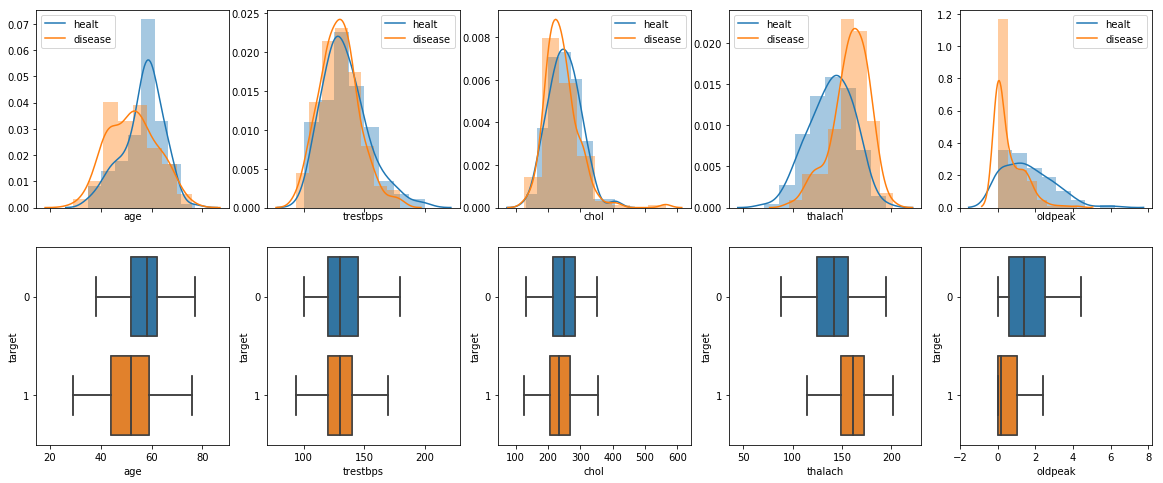

In [7]:
f1, ax1 = plt.subplots(2, 5, figsize=(20, 8), sharex='col', sharey=False)

f1=sns.distplot(df[(df.target==0)][num_feat[0]], kde_kws = {'label': 'healt'},bins = 8, ax=ax1[0,0])
f1=sns.distplot(df[(df.target==1)][num_feat[0]], kde_kws = {'label': 'disease'},bins=8, ax=ax1[0,0])
f1=sns.boxplot(x=num_feat[0], y='target', data=df,ax=ax1[1,0],orient='h',showfliers=False)
f1=sns.boxplot(x=num_feat[0], y='target', data=df,ax=ax1[1,0],orient='h',showfliers=False)

f1=sns.distplot(df[(df.target==0)][num_feat[1]], kde_kws = {'label': 'healt'},bins = 8, ax=ax1[0,1])
f1=sns.distplot(df[(df.target==1)][num_feat[1]], kde_kws = {'label': 'disease'},bins=8, ax=ax1[0,1])
f1=sns.boxplot(x=num_feat[1], y='target', data=df,ax=ax1[1,1],orient='h',showfliers=False)
f1=sns.boxplot(x=num_feat[1], y='target', data=df,ax=ax1[1,1],orient='h',showfliers=False)

f1=sns.distplot(df[(df.target==0)][num_feat[2]], kde_kws = {'label': 'healt'},bins = 8, ax=ax1[0,2])
f1=sns.distplot(df[(df.target==1)][num_feat[2]], kde_kws = {'label': 'disease'},bins=8, ax=ax1[0,2])
f1=sns.boxplot(x=num_feat[2], y='target', data=df,ax=ax1[1,2],orient='h',showfliers=False)
f1=sns.boxplot(x=num_feat[2], y='target', data=df,ax=ax1[1,2],orient='h',showfliers=False)

f1=sns.distplot(df[(df.target==0)][num_feat[3]], kde_kws = {'label': 'healt'},bins = 8, ax=ax1[0,3])
f1=sns.distplot(df[(df.target==1)][num_feat[3]], kde_kws = {'label': 'disease'},bins=8, ax=ax1[0,3])
f1=sns.boxplot(x=num_feat[3], y='target', data=df,ax=ax1[1,3],orient='h',showfliers=False)
f1=sns.boxplot(x=num_feat[3], y='target', data=df,ax=ax1[1,3],orient='h',showfliers=False)

f1=sns.distplot(df[(df.target==0)][num_feat[4]], kde_kws = {'label': 'healt'},bins = 8, ax=ax1[0,4])
f1=sns.distplot(df[(df.target==1)][num_feat[4]], kde_kws = {'label': 'disease'},bins=8, ax=ax1[0,4])
f1=sns.boxplot(x=num_feat[4], y='target', data=df,ax=ax1[1,4],orient='h',showfliers=False)
f1=sns.boxplot(x=num_feat[4], y='target', data=df,ax=ax1[1,4],orient='h',showfliers=False)

### Model Selection

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target',axis=1), df.target, test_size=0.2, random_state=10)

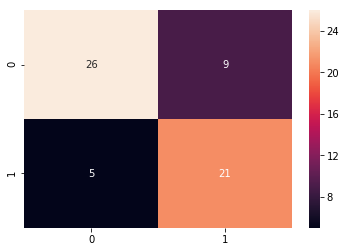

In [9]:
model=LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X_train,y_train)

sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True)

In [10]:
print('The accuracy of the Logistic Regression without feature selection is',accuracy_score(y_test, model.predict(X_test)))

The accuracy of the Logistic Regression without feature selection is 0.7704918032786885


In [11]:
model.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)>

In [14]:
params={'C': [0.001, 0.01, 0.1, 1, 10] }

model=LogisticRegression()
clf=GridSearchCV(model, param_grid=params,refit=True,error_score=accuracy_score)

clf.fit(df.drop('target',axis=1), df.target)

GridSearchCV(cv='warn', error_score=<function accuracy_score at 0x1a15ebe400>,
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
clf.best_params_

{'C': 1}

In [16]:
clf.best_score_

0.834983498349835

In [17]:
clf.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Model Assessment

In [35]:
def accur(rep):
    rkf= RepeatedKFold(n_splits=5, n_repeats=rep, random_state=True)
    acc=[]
    
    for train_I, test_I in rkf.split(df):
        X_fold_train = df.iloc[train_I, :].drop('target',axis=1)
        y_fold_train = df['target'].values[train_I]
        X_fold_test = df.iloc[test_I, :].drop('target',axis=1)
        y_fold_test = df['target'].values[test_I]
        model = clf.best_estimator_
        model.fit(X_fold_train, y_fold_train)
        acc.append(accuracy_score(y_fold_test, model.predict(X_fold_test)))
    print('The estimation of the accuracy score over the test distributions is:', "{:2.2f}%".format(np.mean(acc)*100), '\u00B1', np.std(acc))
    print("The confidence interval is [{:2.1f}%, {:2.1f}%]".format(*np.quantile(acc, q=[0.025, 0.975]) * 100))
    
    return acc

The estimation of the accuracy score over the test distributions is: 83.15% ± 0.04291261580389536
The confidence interval is [73.8%, 91.7%]


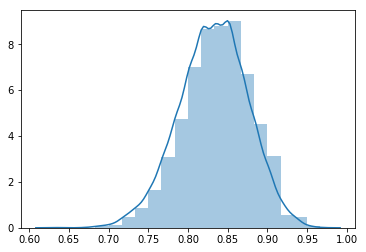

In [38]:
sns.distplot(accur(1000),bins=20)

### Interpretability

In [39]:
model=clf.best_estimator_

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target',axis=1), df.target, test_size=0.2, random_state=10)

In [42]:
perm = PermutationImportance(model, random_state=1, n_iter=10).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0311 ± 0.0496,cp
0.0197 ± 0.0715,oldpeak
0.0148 ± 0.0372,sex
0.0066 ± 0.0393,ca
0.0066 ± 0.0365,slope
0.0049 ± 0.0487,thal
0.0016 ± 0.0098,age
0 ± 0.0000,fbs
0 ± 0.0000,chol
-0.0066 ± 0.0161,trestbps


In [73]:
model.coef_.flatten()

array([ 0.01256061, -0.99908097,  0.98294868, -0.01964912, -0.00140788,
       -0.20521783,  0.6782394 ,  0.02639635, -0.74447491, -0.53027871,
        0.56324543, -0.6235163 , -0.76696152])

In [51]:
df.drop('target',axis=1).columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [89]:
coeff = pd.DataFrame(model.coef_.flatten(), columns = ['value_coeff']) 

In [90]:
coeff['feature_coeff']=df.drop('target',axis=1).columns

In [91]:
coeff.set_index('feature_coeff',inplace=True)

In [92]:
coeff=coeff.sort_values(by='value_coeff',ascending=False)

In [95]:
coeff

,value_coeff
feature_coeff,
cp,0.982949
restecg,0.678239
slope,0.563245
thalach,0.026396
age,0.012561
chol,-0.001408
trestbps,-0.019649
fbs,-0.205218
oldpeak,-0.530279


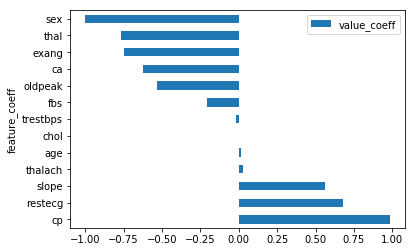

In [100]:
coeff.plot.barh()